# Business Understanding

# Data Understanding

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Data Preparation

In [74]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [75]:
#Load data
train_data = pd.read_csv("../Data/train.csv", index_col=0)
test_data = pd.read_csv("../Data/test.csv", index_col=0)


In [76]:
#preview datasets
train_data.head()  # View first few rows of the training dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
train_data.info()  # Check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [78]:
train_data.describe()  # Summary statistics

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [79]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [80]:
#Drop all missing values
train_data = train_data.dropna(axis=1)
test_data = test_data.dropna(axis=1)

In [81]:
#check missing values
print("Sum of missing values in train dataset is :",train_data.isna().sum().sum())
print()
print("Sum of missing values in test dataset is :",test_data.isna().sum().sum())

Sum of missing values in train dataset is : 0

Sum of missing values in test dataset is : 0


In [82]:
#Split to X and y train datasets
y_train =train_data["SalePrice"]
X_train = train_data.drop("SalePrice", axis=1)

In [83]:
# Separate categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(exclude=['object', 'category']).columns

In [84]:
# Perform One-Hot Encoding using  .get_dummies() on the categorical columns
# X_train categorical columns
X_train_ohe = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)  

# Test dataset
test_ohe = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

KeyError: "['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType'] not in index"

## Manualy choose relevant columns to align train and test datasets

In [ ]:
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

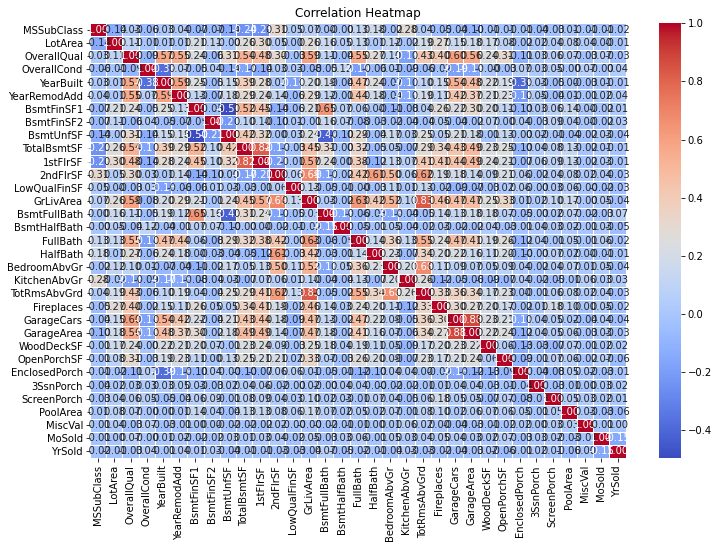

In [ ]:
# Calculate correlation matrix
correlation_matrix = X_train[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#select high corr columns
#Set threshold to abs of 0.7 and above
high_corr_pairs = correlation_matrix.abs() > 0.7

#Identify columns
high_corr_columns = set()
for row in high_corr_pairs.columns:
    for col in high_corr_pairs.index:
        if high_corr_pairs.loc[col, row] and col != row:
            high_corr_columns.add(col)
            high_corr_columns.add(row)
high_corr_columns

{'1stFlrSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'TotRmsAbvGrd',
 'TotalBsmtSF'}

In [ ]:
# Slice dataset
numerical_col =['1stFlrSF','GarageArea','GarageCars','GrLivArea','TotRmsAbvGrd','TotalBsmtSF']


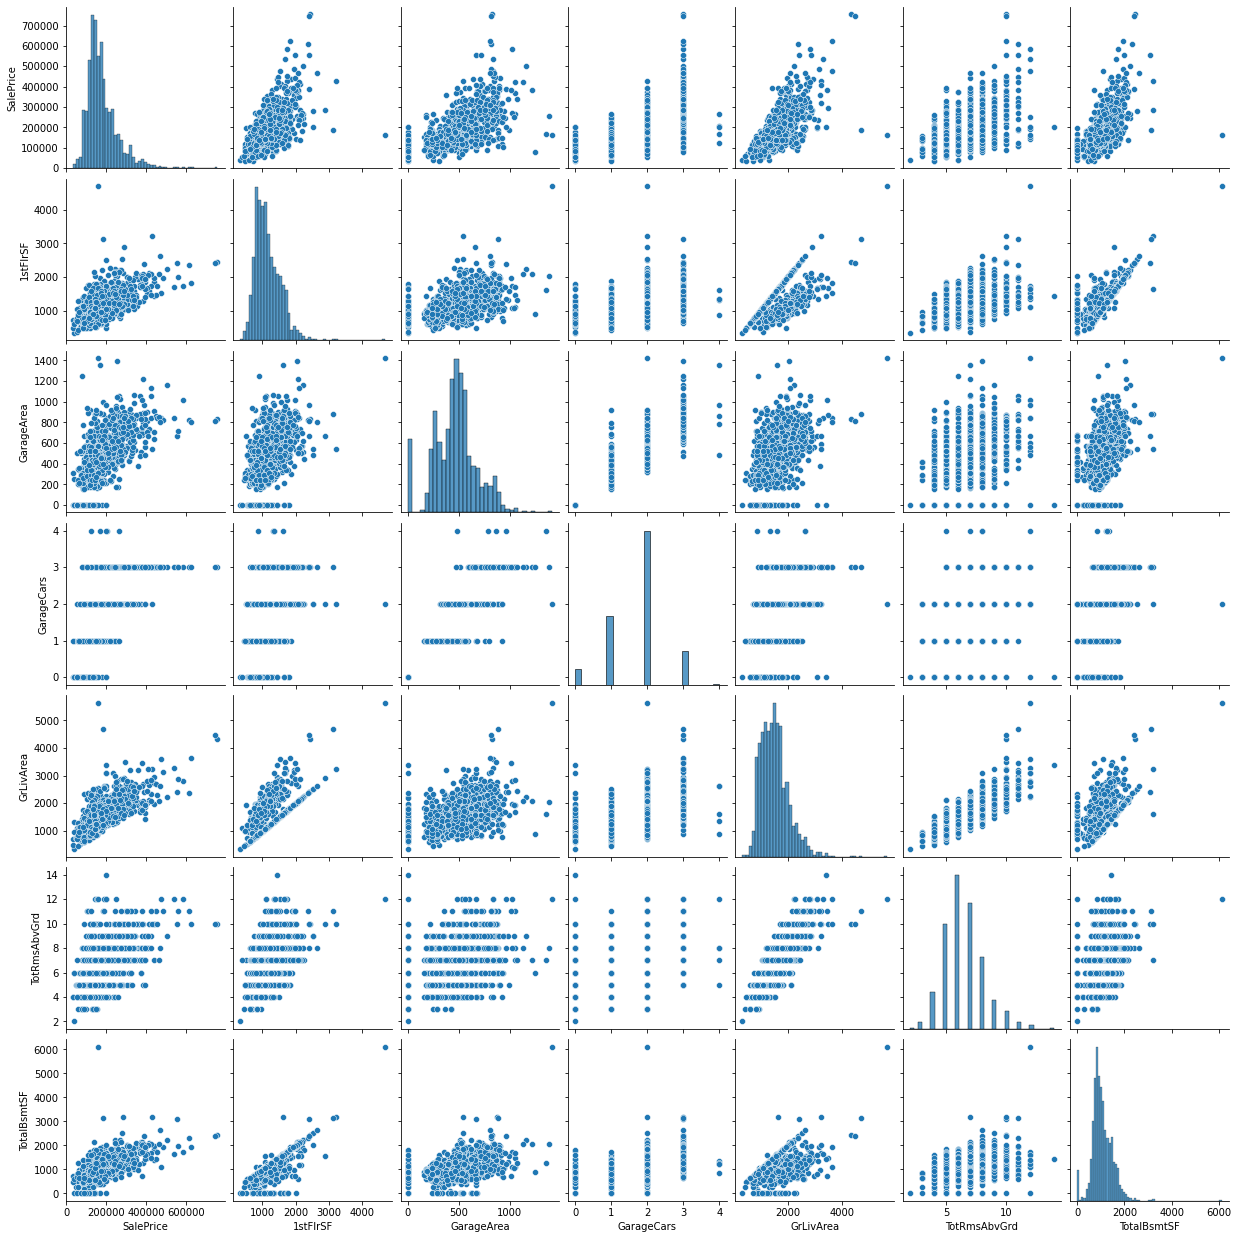

In [ ]:
#pairplot
sns.pairplot(train_data[['SalePrice', '1stFlrSF','GarageArea','GarageCars','GrLivArea','TotRmsAbvGrd','TotalBsmtSF']]);

In [ ]:
#Select relevant columns and create a df
X_train_nums = train_data[['SalePrice', '1stFlrSF','GarageArea','GarageCars','GrLivArea','TotRmsAbvGrd','TotalBsmtSF']]

# Transformation through standardization
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_nums)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_nums.columns)

In [109]:
X_train_scaled_df.shape

(1460, 7)

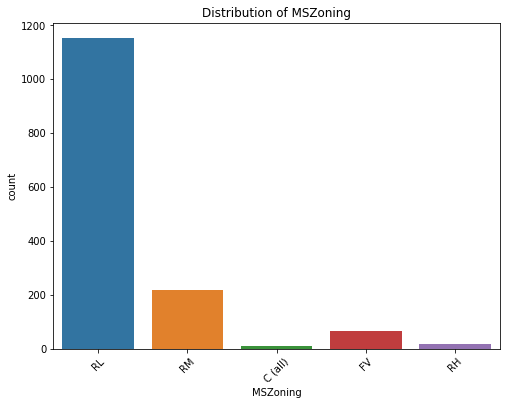

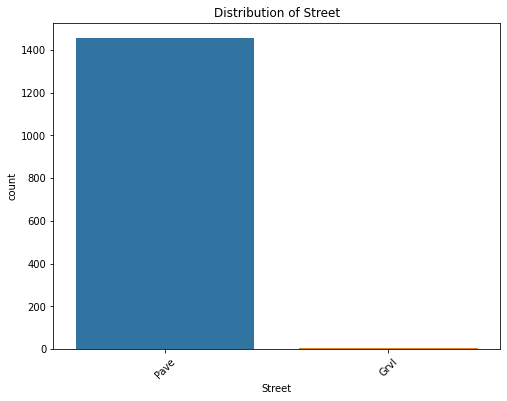

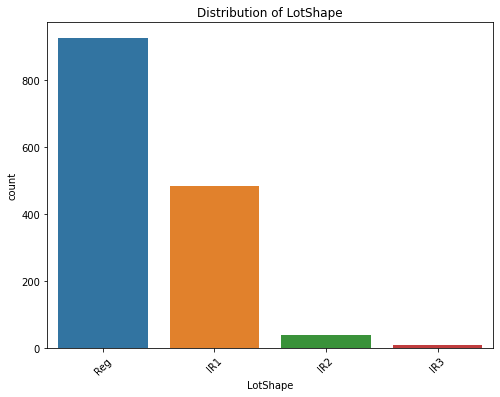

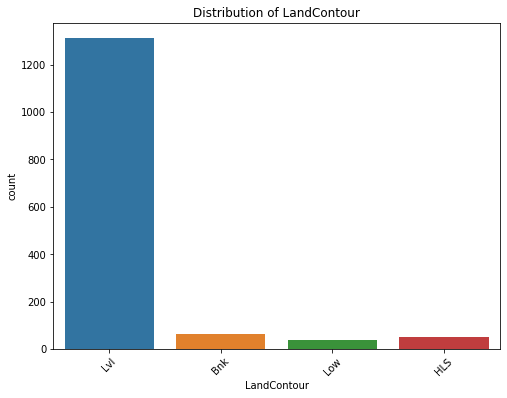

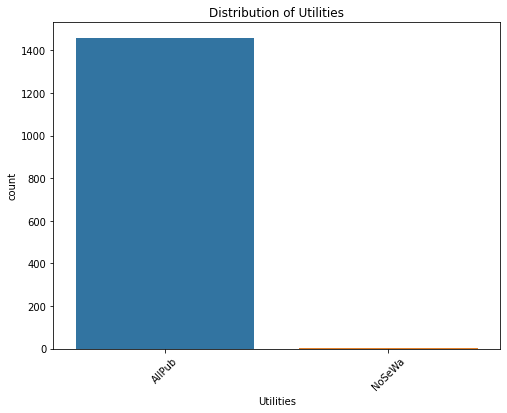

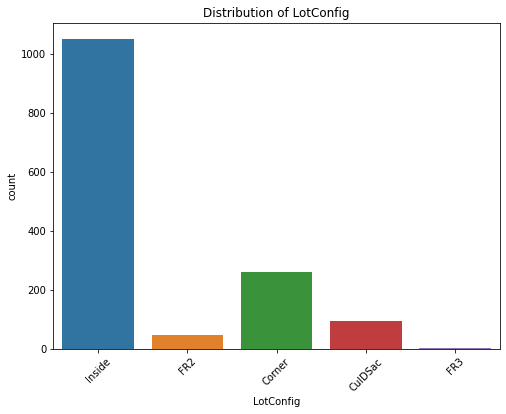

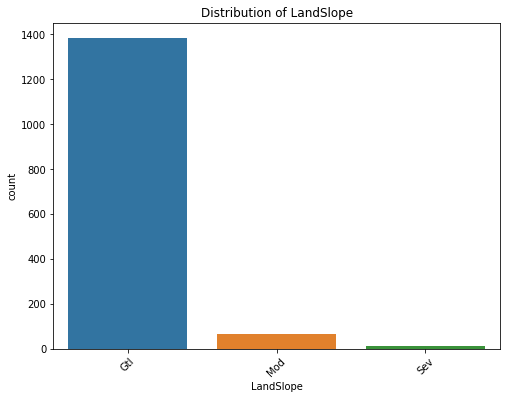

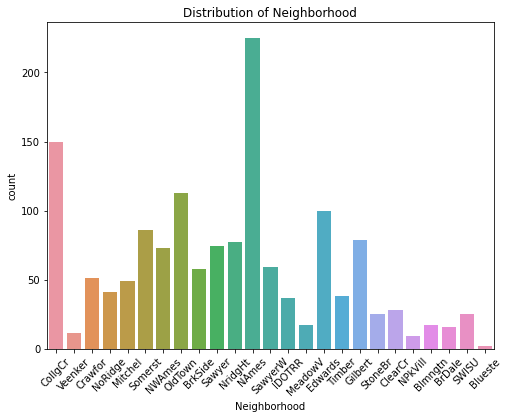

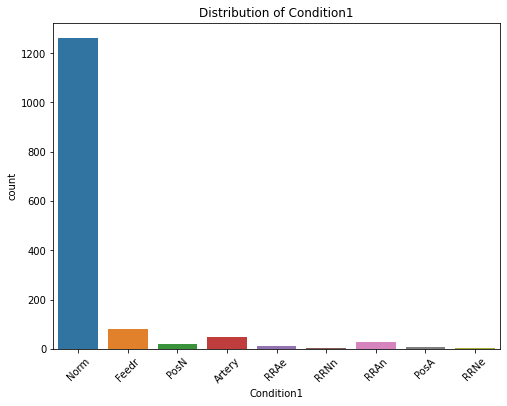

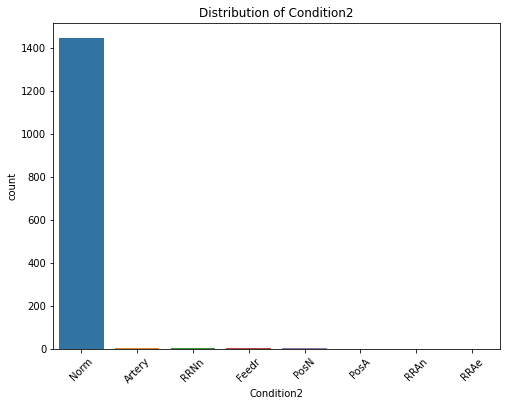

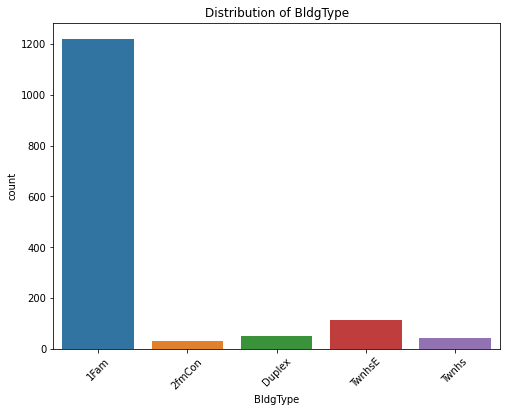

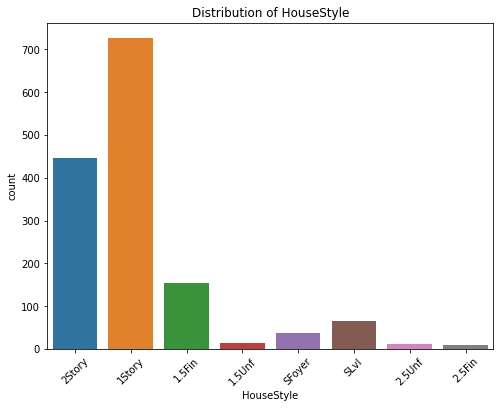

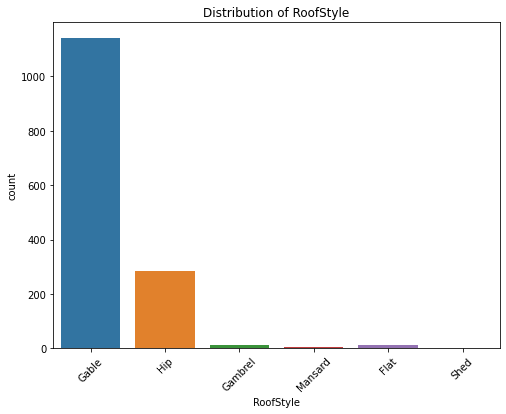

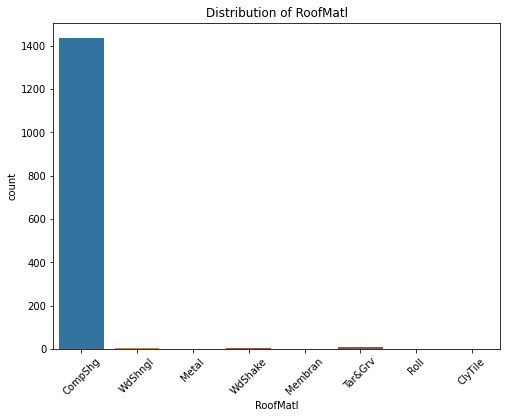

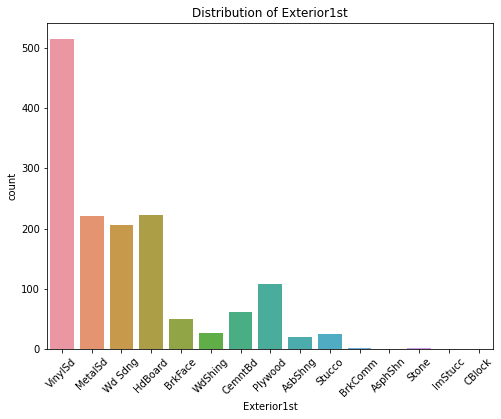

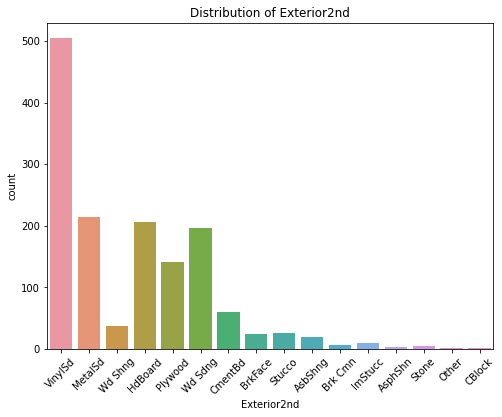

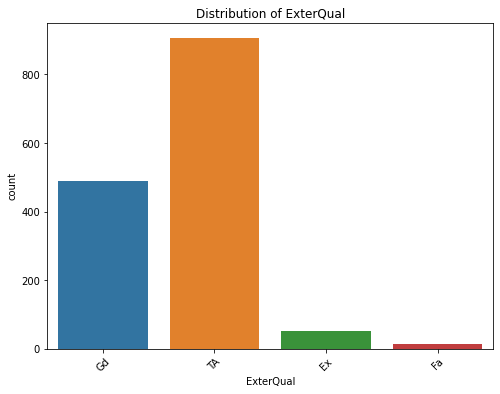

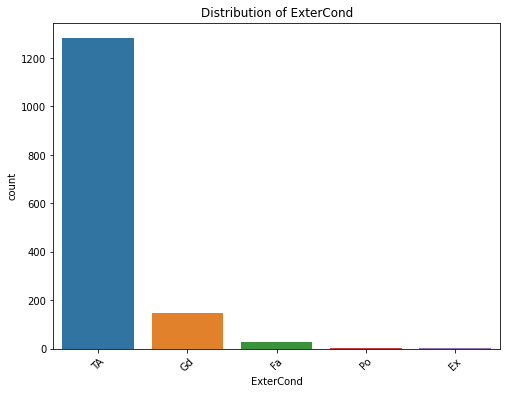

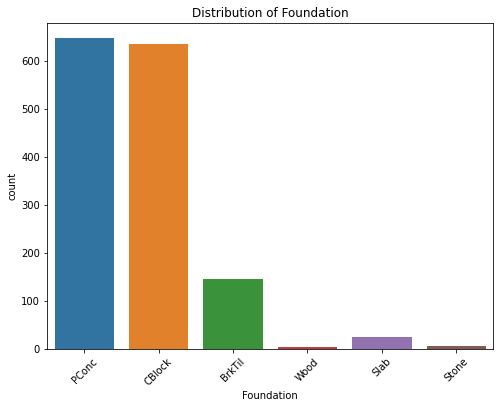

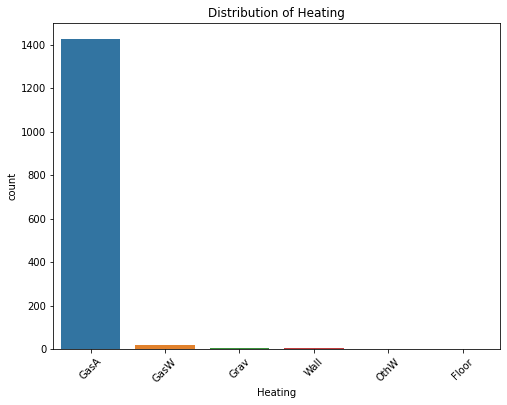

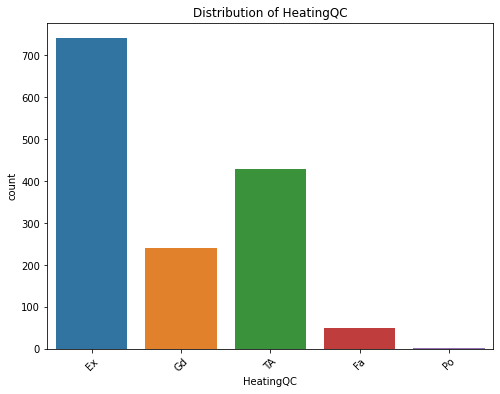

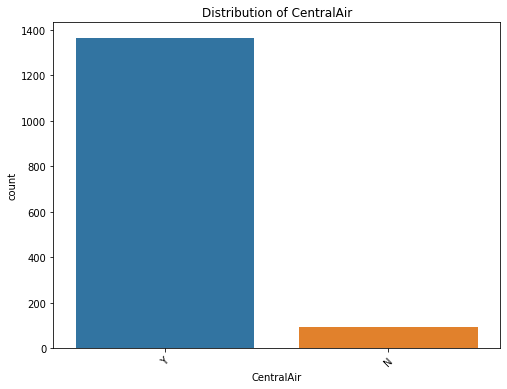

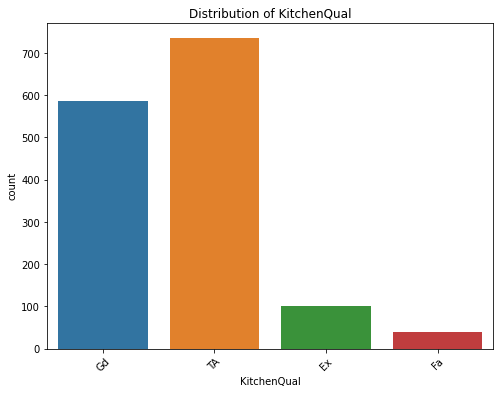

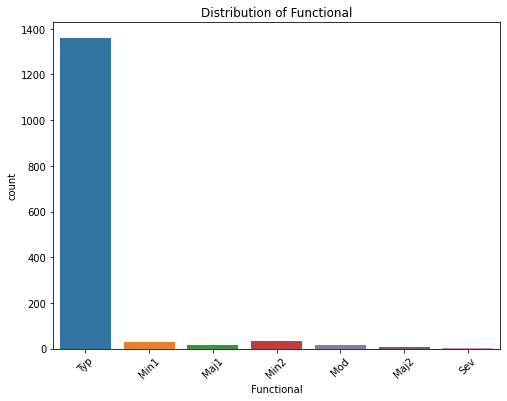

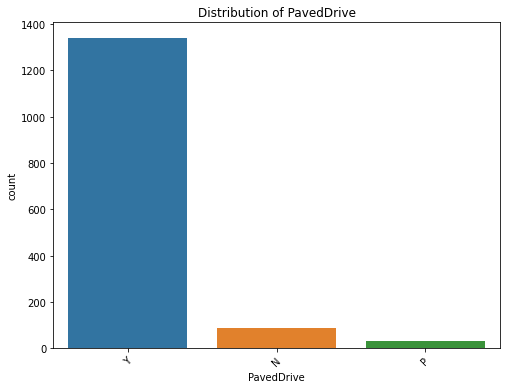

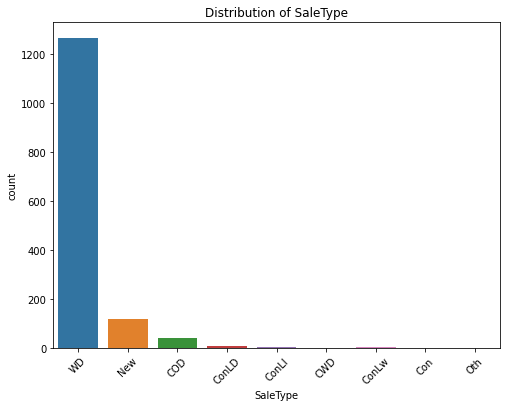

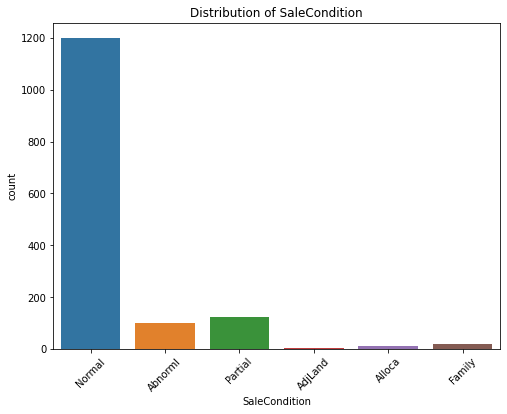

In [ ]:
#categorical variables
# Plot count of categories for each categorical column
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=X_train)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [113]:
#Unique values in each column

for column in categorical_columns.columns:
    print(f"Unique values in column '{column}':")
    print(categorical_columns[column].unique())
    print()

AttributeError: 'Index' object has no attribute 'columns'

In [95]:
relevant_cat_cols = ['LotShape','ExterQual','Foundation']


In [ ]:
X_train_encoded = pd.get_dummies(X_train[relevant_cat_cols], drop_first=True, dtype=int)
X_test_encoded = pd.get_dummies(test_data[relevant_cat_cols], drop_first=True, dtype=int)

In [110]:
X_train_encoded.shape

(1460, 11)

In [99]:
X_test_encoded.head()

,LotShape_IR2,LotShape_IR3,LotShape_Reg,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
Id,,,,,,,,,,,
1461,0,0,1,0,0,1,1,0,0,0,0
1462,0,0,0,0,0,1,1,0,0,0,0
1463,0,0,0,0,0,1,0,1,0,0,0
1464,0,0,0,0,0,1,0,1,0,0,0
1465,0,0,0,0,1,0,0,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   LotShape_IR2       1460 non-null   int32
 1   LotShape_IR3       1460 non-null   int32
 2   LotShape_Reg       1460 non-null   int32
 3   ExterQual_Fa       1460 non-null   int32
 4   ExterQual_Gd       1460 non-null   int32
 5   ExterQual_TA       1460 non-null   int32
 6   Foundation_CBlock  1460 non-null   int32
 7   Foundation_PConc   1460 non-null   int32
 8   Foundation_Slab    1460 non-null   int32
 9   Foundation_Stone   1460 non-null   int32
 10  Foundation_Wood    1460 non-null   int32
 11  KitchenQual_Fa     1460 non-null   int32
 12  KitchenQual_Gd     1460 non-null   int32
 13  KitchenQual_TA     1460 non-null   int32
dtypes: int32(14)
memory usage: 91.2 KB


Unique values in column 'MSZoning':
['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique values in column 'Street':
['Pave' 'Grvl']

Unique values in column 'LotShape':
['Reg' 'IR1' 'IR2' 'IR3']

Unique values in column 'LandContour':
['Lvl' 'Bnk' 'Low' 'HLS']

Unique values in column 'Utilities':
['AllPub' 'NoSeWa']

Unique values in column 'LotConfig':
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Unique values in column 'LandSlope':
['Gtl' 'Mod' 'Sev']

Unique values in column 'Neighborhood':
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Unique values in column 'Condition1':
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Unique values in column 'Condition2':
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Unique values in column 'BldgType':
['1Fam' '2fmCon' 'Duplex'

# EDA

# Model

## Model Evaluation